In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat.processRoc(df=pd.read_csv('examples_data/roc_cat.csv'),
           order=3, 
           total_samples=1000,
           positive_samples=470,
           alpha=0.01,
           prevalence=.5)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=False)
zt.usample(precision=3)
zt.getBounds()

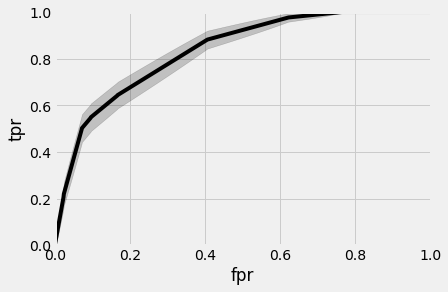

In [4]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [5]:
zt.auc()

(0.8342273145150418, 0.8632434514371521, 0.8052129775827326)

In [6]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-
fpr,,,,,,
0.000,0.000000,1.000000,0.500000,0.500000,8.794218,1.000000
0.001,0.010953,1.603179,0.504526,0.502294,10.952605,0.990938
0.002,0.017857,0.848352,0.507929,0.504036,8.928571,0.984111
0.003,0.026786,0.875490,0.511893,0.506084,8.928571,0.976143
0.004,0.035714,0.888060,0.515857,0.508153,8.928571,0.968158
...,...,...,...,...,...,...
0.996,1.000000,0.501002,0.502000,1.000000,1.004016,0.000000
0.997,1.000000,0.500751,0.501500,1.000000,1.003009,0.000000
0.998,1.000000,0.500501,0.501000,1.000000,1.002004,0.000000


In [8]:
zt.operating_zone(LRminus=.95,LRplus=4)
display(zt._operating_zone)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=100)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=100)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-
high precision,0.023,0.205357,0.942395,0.591179,0.551871,8.928571,0.813350
high sensitivity,0.157,0.629630,0.799347,0.736315,0.696316,4.010380,0.439348


high precision operation:
 For every 100 positive instances
 we raise 31 flags,
 out of which 29 are true positives
 3 are false alarms
 71 cases are missed


high recall operation:
 For every 100 positive instances
 we raise 74 flags,
 out of which 59 are true positives
 14 are false alarms
 41 cases are missed


## writing tables to latex

In [9]:
from zedstat.textable import textable
textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [10]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-
fpr,,,,,,
0.023,$0.205 \pm 0.047$,$0.942 \pm 0.021$,$0.591 \pm 0.023$,$0.551 \pm 0.014$,$8.928 \pm 2.086$,$0.813 \pm 0.049$
0.157,$0.629 \pm 0.057$,$0.799 \pm 0.014$,$0.736 \pm 0.028$,$0.696 \pm 0.032$,$4.010 \pm 0.365$,$0.439 \pm 0.068$


In [12]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     